In [3]:
# For data manipulation
import numpy as np
import pandas as pd
import seaborn as sns

# To fetch financial data
import yfinance as yf

# For visualisation
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Set the ticker as 'EURUSD=X'
forex_data = yf.download('EURUSD=X', start='2022-12-15', end='2022-12-16')

# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

# Display the last five rows
forex_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-15,1.067635,1.072559,1.060738,1.067635,1.067635,0


In [2]:
forex_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-13,1.054174,1.066894,1.052931,1.054174,1.054174,0
2022-12-14,1.062665,1.066985,1.062011,1.062665,1.062665,0


In [10]:
forex_data[forex_data['Close']==forex_data['Adj Close']]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,1.217285,1.221699,1.213499,1.218027,1.218027,0
2021-01-04,1.224905,1.230999,1.217137,1.225070,1.225070,0
2021-01-05,1.225295,1.229483,1.224995,1.225160,1.225160,0
2021-01-06,1.229861,1.235025,1.226693,1.230027,1.230027,0
2021-01-07,1.233776,1.234568,1.224665,1.234111,1.234111,0
...,...,...,...,...,...,...
2021-12-24,1.132464,1.134430,1.130838,1.132734,1.132734,0
2021-12-27,1.132387,1.133500,1.130416,1.132426,1.132426,0
2021-12-28,1.132978,1.133600,1.129038,1.133003,1.133003,0


# Trying to get values of a day

In [11]:
# Set the ticker as 'EURUSD=X'
forex_data_day = yf.download('EURUSD=X', start="2022-10-20", end="2022-10-21", interval='2m')

# Set the index to a datetime object
forex_data_day.index = pd.to_datetime(forex_data_day.index)

# Display the last five rows
forex_data_day.shape

[*********************100%***********************]  1 of 1 completed


(717, 6)

In [12]:
forex_data_day.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-10-20 00:00:00,0.976944,0.976944,0.976753,0.976753,0.976753,0
2022-10-20 00:02:00,0.976753,0.976753,0.976658,0.976658,0.976658,0
2022-10-20 00:04:00,0.976562,0.976562,0.976562,0.976562,0.976562,0
2022-10-20 00:06:00,0.976658,0.976753,0.976658,0.976753,0.976753,0
2022-10-20 00:08:00,0.976562,0.976562,0.976562,0.976562,0.976562,0


In [13]:
forex_data_day.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-10-20 23:50:00,0.978474,0.978474,0.978474,0.978474,0.978474,0
2022-10-20 23:52:00,0.978761,0.978761,0.978474,0.978474,0.978474,0
2022-10-20 23:54:00,0.978474,0.978474,0.978474,0.978474,0.978474,0
2022-10-20 23:56:00,0.978474,0.978569,0.978474,0.978569,0.978569,0
2022-10-20 23:58:00,0.978665,0.978665,0.978665,0.978665,0.978665,0


In [15]:
fig = go.Figure(data=[go.Candlestick(
                open=forex_data_day['Open'],
                high=forex_data_day['High'],
                low=forex_data_day['Low'],
                close=forex_data_day['Close'])])
fig.show()

NameError: name 'go' is not defined

<AxesSubplot:>

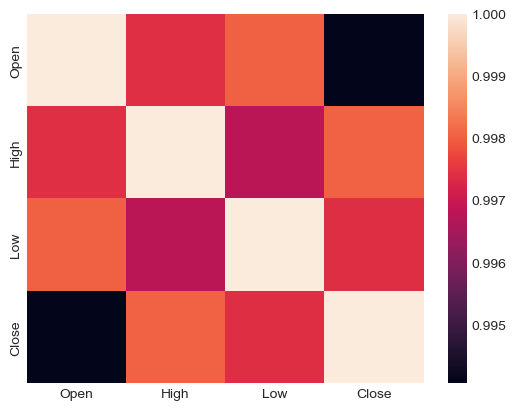

In [34]:
df = forex_data_day.iloc[:, 0:4].corr(method='pearson', min_periods=1)
sns.heatmap(df, 
        xticklabels=df.columns,
        yticklabels=df.columns)